In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Functions

In [2]:
def get_null_percentage(dataframe):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(dataframe)
    
    # Calculate the percentage of null values for each feature
    null_percentage = (dataframe.isnull().sum() / total_rows) * 100
    
    return null_percentage

In [3]:
def plot_linear_regression_line(x_axis, y_axis):
    # Extract the data
    x = df[x_axis]
    y = df[y_axis]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create a scatter plot
    fig = px.scatter(df, x=x_axis, y=y_axis)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Add the regression line to the plot
    fig.add_scatter(x=x, y=regression_line, mode='lines', name='Regression Line')

    # Show the plot
    fig.show()

# Read the data from the csv file

In [4]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.shape

(500, 9)

In [7]:
df.drop_duplicates()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [8]:
df.shape

(500, 9)

In [9]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [10]:
df.select_dtypes('object')

,customer name,customer e-mail,country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil
...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe
497,Pearl,penatibus.et@massanonante.com,Philippines
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana


In [11]:
df.select_dtypes('number')

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [12]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace = True)

In [13]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [15]:
features = ['age', 'annual Salary','credit card debt', 'net worth', 'car purchase amount']
null_percentage = get_null_percentage(df[features])

# Print the null percentage for each feature
print("Percentage of null values for each feature:")
print(null_percentage,"%")

Percentage of null values for each feature:
age                    0.0
annual Salary          0.0
credit card debt       0.0
net worth              0.0
car purchase amount    0.0
dtype: float64 %


# Data Visualisation

### (1) age

In [16]:
plot_linear_regression_line("age","car purchase amount")

<Axes: xlabel='car purchase amount', ylabel='Density'>

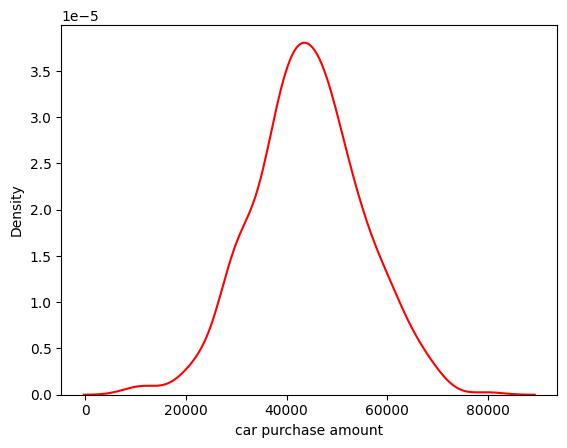

In [17]:
sns.kdeplot(data=df['age'], x=df['car purchase amount'], color='red')

In [18]:
plot_linear_regression_line("annual Salary", "car purchase amount")

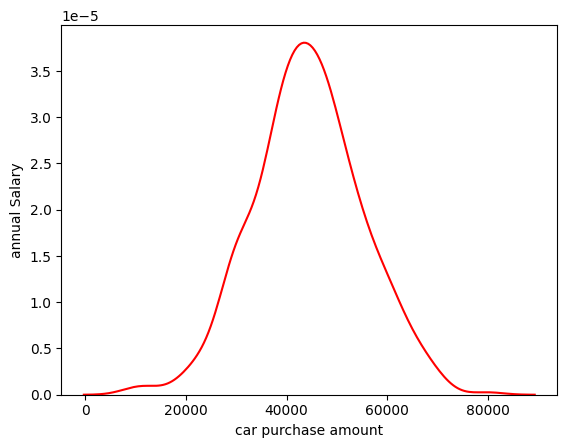

In [19]:
sns.kdeplot(data=df['annual Salary'], x=df['car purchase amount'], color='red')

# Set labels and titles
plt.xlabel('car purchase amount')
plt.ylabel('annual Salary')

# Show the plot
plt.show()

In [20]:
plot_linear_regression_line("credit card debt", "car purchase amount")

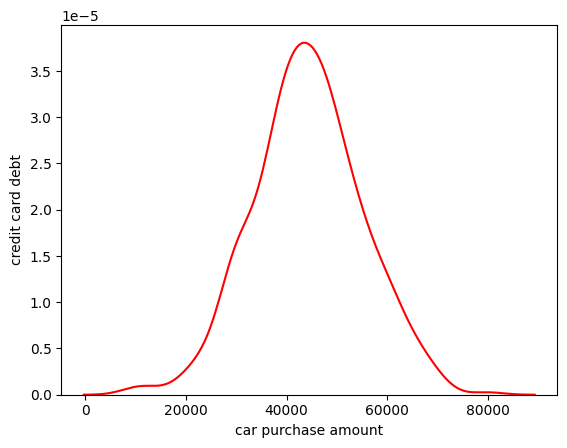

In [21]:
sns.kdeplot(data=df['credit card debt'], x=df['car purchase amount'], color='red')

# Set labels and titles
plt.xlabel('car purchase amount')
plt.ylabel('credit card debt')

# Show the plot
plt.show()

In [22]:
#fig = px.scatter(df, x="net worth", y="car purchase amount")
#fig.show()
plot_linear_regression_line("net worth", "car purchase amount")

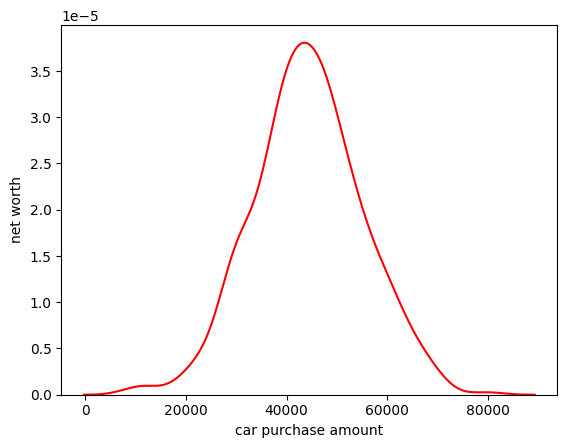

In [23]:
sns.kdeplot(data=df['net worth'], x=df['car purchase amount'], color='red')

# Set labels and titles
plt.xlabel('car purchase amount')
plt.ylabel('net worth')

# Show the plot
plt.show()

In [24]:
df.columns

Index(['age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [25]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [26]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame
scaler.fit(X)

# Transform the DataFrame
df_scaled = scaler.transform(X)

In [27]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Create dictionaries to store R2 scores, train accuracies, and test accuracies
r2_scores = {}
train_accuracies = {}
test_accuracies = {}

# Create a dictionary of regressors
Regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Loop over all regressors
for regressor_name, regressor in Regressors.items():
    if regressor_name == 'Polynomial Regression':
        # For Polynomial Regression, transform the features
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        regressor = LinearRegression()  # Replace with a linear model for polynomial regression
    else:
        X_train_poly = X_train
        X_test_poly = X_test
    
    # Fit the regressor on the train set
    regressor.fit(X_train_poly, y_train)

    print('Regressor:', regressor_name)
    
    # Calculate and print the R2 score
    r2_score = regressor.score(X_test_poly, y_test)
    r2_scores[regressor_name] = r2_score
    print('R2 score:', r2_score)
    
    # Calculate and print the train accuracy
    train_accuracy = regressor.score(X_train_poly, y_train) * 100
    train_accuracies[regressor_name] = train_accuracy
    print(f'Train Accuracy: {train_accuracy}%')

    # Calculate and print the test accuracy
    test_accuracy = regressor.score(X_test_poly, y_test) * 100
    test_accuracies[regressor_name] = test_accuracy
    print(f'Test Accuracy: {test_accuracy}%')
    
    print("\n-----------------------------------------\n")


Regressor: Linear Regression
R2 score: 0.9999999808303804
Train Accuracy: 99.99999812450085%
Test Accuracy: 99.99999808303805%

-----------------------------------------

Regressor: Ridge Regression
R2 score: 0.9999999799344048
Train Accuracy: 99.99999806600522%
Test Accuracy: 99.99999799344049%

-----------------------------------------

Regressor: Lasso Regression
R2 score: 0.9999999805573352
Train Accuracy: 99.99999811245954%
Test Accuracy: 99.99999805573351%

-----------------------------------------

